In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

import libraries

In [ ]:
start = '2010-01-01'
end = '2019-12-31'
stock = 'AAPL'

data = yf.download(stock, start=start, end=end)
data.reset_index(inplace=True)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461975,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
_df_12['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

import dataset and print data

In [ ]:
df = data[['Close']]


This code extracts the 'Close' column from the DataFrame data and creates a new DataFrame containing only that column.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

This code initializes a MinMaxScaler to scale data to a range between 0 and 1, then applies it to the DataFrame df to transform its values accordingly.

In [ ]:

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

This code calculates the size of the training dataset as 80% of the total scaled data, then splits the scaled data into two parts: train_data containing the first 80% and test_data containing the remaining 20%.

In [ ]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

This function generates sequences of data for time series analysis. It takes an input array data and a time_step parameter (defaulting to 60). For each point in data, it creates a sequence of time_step length for X and a corresponding target value for y. It returns the sequences X and their targets y as NumPy arrays.

In [ ]:
time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

This code sets the time_step to 60 and then uses the create_sequences function to generate sequences and targets for both the training and testing datasets, resulting in X_train and y_train for the training data, and X_test and y_test for the testing data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

This code reshapes X_train and X_test to have a third dimension of size 1, transforming them into the 3D shape (samples, time steps, features) required for input into many neural network models, such as LSTM or GRU

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



This code defines a neural network model using the Sequential API from Keras:

An LSTM layer with 50 units, configured to return sequences, is added with an input shape of (time_step, 1).
Another LSTM layer with 50 units, configured not to return sequences, is added.
A Dense layer with 25 units is added.
A final Dense layer with 1 unit is added, which will provide the model's output

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0303
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0020
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 2.8496e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 1.7264e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 1.6083e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 1.5150e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 1.6876e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 1.5429e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 1.5355e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 1.4513e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 1.5429e-04
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 1.5066e-04
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 1.3614e-04
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 1.4438e-04
Epoch

The model is compiled using the Adam optimizer and mean squared error as the loss function.
The model is trained on X_train and y_train with a batch size of 64 for 10 epochs.

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


the code first generates predictions using the model and then transforms those predictions back to the original scale of the data.

In [ ]:
lenght=len(predictions)
print(lenght)

442


 the code calculates and prints the total number of predictions in the predictions array or list.

In [ ]:

train = df[:train_size]
valid = df[train_size:train_size + lenght]
valid['Predictions'] = predictions

<ipython-input-171-2edc397a2556>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


the code segments the original DataFrame into training and validation sets and then adds the model’s predictions to the validation set.

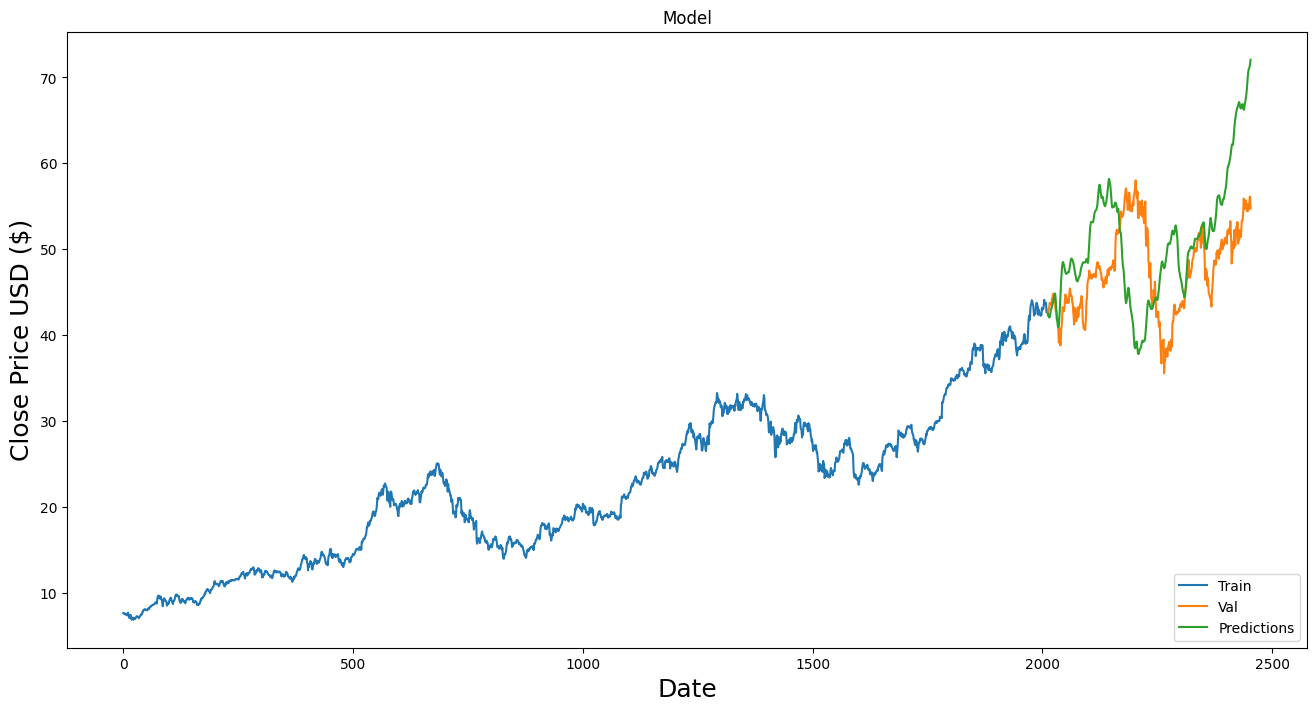

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


 the code creates and customizes a plot showing historical close prices, validation close prices, and model predictions, with appropriate labels and a legend for clarity.